In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x=np.array(([0,0],[0,1],[1,0],[1,1]))
y=np.array(([0],[1],[1],[0]))

In [4]:
x_b=np.array(([1,0,0],[1,0,1],[1,1,0],[1,1,1]))


In [5]:
# define the ANN archi
inp_size=3
hid_size=3
out_size=1

In [6]:
w1=np.random.randn(inp_size,hid_size)
w1

array([[ 0.54705157,  0.835948  ,  1.07350745],
       [-0.45069464, -0.32689406,  0.03867785],
       [ 1.20854111,  0.89751854, -0.32168604]])

In [7]:
w2=np.random.randn(hid_size,out_size)
w2

array([[-0.73569017],
       [-1.38995357],
       [-1.1235562 ]])

In [8]:
def sigmoid(z):
    sig=1/(1+np.exp(-z))
    return sig

def forward(x):
    z1=np.dot(x,w1)
    y1=sigmoid(z1)
    z2=np.dot(y1,w2)
    out=sigmoid(z2)
    return out,y1

def backward(x,y,w1,w2,y1,out):
    out_err=y-out
    out_delta=out_err*(out*(1-out))
    
    y1_err=np.dot(out_delta,w2.T)
    y1_delta=y1_err*(y1*(1-y1))
    
    w2+=np.dot(y1.T,out_delta)  # consider alpha=1  
    w1+=np.dot(x.T,y1_delta)
    
    return w1,w2

def train(x,y):
    [out,y1]=forward(x)
    backward(x,y,w1,w2,y1,out)
    return w1,w2,out

def predict(tes):
    [out,y1]=forward(tes)
    pred=out
    return pred


In [9]:
loss=np.zeros([1000,1],dtype=float)
for i in range(1000):
    [w1,w2,out]=train(x_b,y)
    loss[i]=np.mean(np.square(y-out))  
    #print(loss[i])

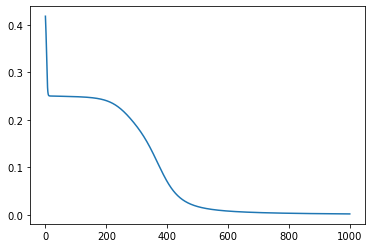

In [10]:
plt.plot(loss)

In [11]:
tes=np.array(([1,0,0],[1,0,1],[1,1,0],[1,1,1]))
pred=predict(tes)
print(pred)

[[0.03070418]
 [0.94752567]
 [0.95641241]
 [0.06034971]]


In [12]:
y

array([[0],
       [1],
       [1],
       [0]])

In [13]:
w1

array([[-0.6886049 ,  2.69274438, -0.88465938],
       [ 3.01873002, -4.97109101, -5.24365256],
       [ 4.16727831,  5.86474777,  2.97274304]])

In [14]:
w2

array([[ 4.12110226],
       [-7.34481505],
       [ 7.01234033]])

In [15]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x,y)
ypred=logit.predict(x)
ypred

C:\Users\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, 0])